<h1>CONTENTS<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SOURCE" data-toc-modified-id="SOURCE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SOURCE</a></span></li><li><span><a href="#ABOUT-PROJECT" data-toc-modified-id="ABOUT-PROJECT-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ABOUT PROJECT</a></span></li><li><span><a href="#IMPORTING-LIBRARIES" data-toc-modified-id="IMPORTING-LIBRARIES-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>IMPORTING LIBRARIES</a></span></li><li><span><a href="#IMPORTING-DATA" data-toc-modified-id="IMPORTING-DATA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>IMPORTING DATA</a></span></li><li><span><a href="#STATISTICAL-OVERVIEW" data-toc-modified-id="STATISTICAL-OVERVIEW-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>STATISTICAL OVERVIEW</a></span><ul class="toc-item"><li><span><a href="#DATA-DESCRIPTION" data-toc-modified-id="DATA-DESCRIPTION-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>DATA DESCRIPTION</a></span></li><li><span><a href="#INFORMATION" data-toc-modified-id="INFORMATION-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>INFORMATION</a></span><ul class="toc-item"><li><span><a href="#DROPPING-UNIQUE-COLUMNS" data-toc-modified-id="DROPPING-UNIQUE-COLUMNS-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>DROPPING UNIQUE COLUMNS</a></span></li></ul></li></ul></li><li><span><a href="#EXPLORATORY-ANALYSIS" data-toc-modified-id="EXPLORATORY-ANALYSIS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>EXPLORATORY ANALYSIS</a></span><ul class="toc-item"><li><span><a href="#CORRELATION-ANALYSIS" data-toc-modified-id="CORRELATION-ANALYSIS-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CORRELATION ANALYSIS</a></span></li><li><span><a href="#OUTLIERS" data-toc-modified-id="OUTLIERS-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>OUTLIERS</a></span><ul class="toc-item"><li><span><a href="#DETECTING-OUTLIERS" data-toc-modified-id="DETECTING-OUTLIERS-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>DETECTING OUTLIERS</a></span></li><li><span><a href="#TREATING-OUTLIERS" data-toc-modified-id="TREATING-OUTLIERS-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>TREATING OUTLIERS</a></span></li></ul></li></ul></li><li><span><a href="#PREDICTIVE-ANALYSIS" data-toc-modified-id="PREDICTIVE-ANALYSIS-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PREDICTIVE ANALYSIS</a></span><ul class="toc-item"><li><span><a href="#RANDOM-SAMPLING" data-toc-modified-id="RANDOM-SAMPLING-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>RANDOM SAMPLING</a></span></li><li><span><a href="#FEATURE-SCALING" data-toc-modified-id="FEATURE-SCALING-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>FEATURE SCALING</a></span></li><li><span><a href="#LOGISTIC-REGRESSION" data-toc-modified-id="LOGISTIC-REGRESSION-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>LOGISTIC REGRESSION</a></span></li><li><span><a href="#DECISION-TREE" data-toc-modified-id="DECISION-TREE-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>DECISION TREE</a></span></li><li><span><a href="#RANDOM-FOREST" data-toc-modified-id="RANDOM-FOREST-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>RANDOM FOREST</a></span></li><li><span><a href="#GRADIENT-BOOSTING" data-toc-modified-id="GRADIENT-BOOSTING-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>GRADIENT BOOSTING</a></span></li><li><span><a href="#EXTREME-GRADIENT-BOOSTING" data-toc-modified-id="EXTREME-GRADIENT-BOOSTING-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>EXTREME GRADIENT BOOSTING</a></span></li></ul></li></ul></div>

## SOURCE

    The following data set was extracted from the website : https://www.brenda-enzymes.org/index.php 

## ABOUT PROJECT

    The objective of this classification project is to build predictive models using Logistic Regression, Decision Tree, 
    Random Forest, and Ensemble Techniques to map the relationships between enzymes and their possible substrates. Enzymes, 
    as catalysts, facilitate one or more specific reactions, and understanding the associations between enzymes and their 
    potential substrates holds significant utility in various domains, including bioinformatics, drug discovery, and 
    biotechnology. 

## IMPORTING LIBRARIES

In [1]:
import warnings

import numpy as np

import pandas as pd

import seaborn as sns

import xgboost as XGB

import notebook_as_pdf

from scipy import stats

import ydata_profiling as P

import matplotlib.pyplot as plt

warnings.filterwarnings ( 'ignore' )

pd.set_option ( "display.max_columns" , None )

from sklearn.tree import DecisionTreeClassifier 

from sklearn.linear_model import LogisticRegression 

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import GridSearchCV , KFold

from sklearn.preprocessing import LabelBinarizer , MinMaxScaler , Normalizer , StandardScaler 

from sklearn.metrics import accuracy_score , auc , precision_score , confusion_matrix , f1_score , recall_score , roc_auc_score , roc_curve 

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier , StackingClassifier

## IMPORTING DATA 

In [2]:
DF_Train = pd.read_csv ( 'Enzyme_Train.csv' )

DF_Test = pd.read_csv ( "Enzyme_Test.csv" )

In [3]:
DF_Train

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,347.063084,1.562500,2.187500,2.687500,-1.87,333.112,4.879408,11.426427,-5.077909,16,17.248535,15.645394,0.000000,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,0.000000,74.024203,2.666667,2.666667,2.666667,-0.53,70.027,0.729375,5.506944,0.250000,0,0.000000,0.000000,0.000000,0.000000,6.066367,0.000000,6.420822,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,297.089560,1.461538,2.153846,2.769231,-3.15,282.220,2.045502,12.118907,-0.446105,8,34.480943,0.000000,0.000000,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,0.000000,265.959270,0.950000,1.400000,1.950000,-0.44,257.119,8.424399,10.909292,-4.181527,7,0.000000,7.822697,19.420579,0.000000,0.000000,7.822697,108.961047,9.088795,45.583333,0,0,0,1,1,0,0,0


In [4]:
DF_Test

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,204.079707,1.384615,1.923077,2.307692,-0.24,192.197,3.247123,10.248693,-4.734642,7,18.311899,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,315.210331,0.571429,0.857143,1.159286,-1.81,280.263,10.070000,11.917927,-0.303333,4,0.000000,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,101.047679,1.500000,2.200000,2.400000,-0.86,94.049,5.430000,9.694444,-0.833333,3,0.000000,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,187.115661,1.625000,2.500000,2.875000,-0.57,168.111,3.453383,10.215871,0.291343,6,0.000000,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,891.167638,1.056604,1.716981,2.358491,-2.44,847.328,8.424399,12.642250,-5.570647,20,36.259886,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,24726,246.422865,4.036581,2.816709,2.816709,1.875634,1.875634,1.235986,0.362743,24.146543,6.420822,146.105528,1.857143,2.000000,2.571429,-1.10,136.109,1.902081,10.261759,-1.141574,5,12.207933,11.938611,0.000000,0.000000,0.000000,11.938611,12.207933,9.589074,30.000000,2,2
9889,24727,591.069706,8.770857,5.682461,5.682461,4.050440,4.050440,2.167855,1.770579,0.000000,28.228515,304.240230,1.222222,1.888889,2.666667,-2.50,272.218,1.235986,12.271660,-0.336257,5,5.749512,0.000000,18.199101,37.107112,17.696186,10.969244,0.000000,0.000000,53.166667,0,0
9890,24728,378.113435,6.310349,3.402334,4.317724,2.817428,4.071978,1.970236,1.165747,36.705949,0.000000,260.029719,1.000000,1.571429,2.000000,-0.23,247.031,2.973905,10.367703,-1.834815,10,24.918781,7.822697,0.000000,0.000000,0.000000,7.822697,24.099010,4.736863,50.652870,0,0
9891,24729,737.653518,9.949161,7.337949,7.337949,4.428511,5.948361,3.972459,2.160881,36.992053,0.000000,314.068426,0.977273,1.454545,2.000000,-1.87,294.051,3.464309,11.550030,-1.568935,12,36.259886,0.000000,0.000000,0.000000,6.196844,0.000000,12.462662,9.589074,50.250000,0,0


## STATISTICAL OVERVIEW

### DATA DESCRIPTION

In [5]:
DF_Train.describe ( ).transpose ( )

,count,mean,std,min,25%,50%,75%,max
id,14838.0,7418.500000,4283.505982,0.000000,3709.250000,7418.500000,11127.750000,14837.000000
BertzCT,14838.0,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.0,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.0,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.0,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.0,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.0,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.0,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.0,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.0,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954


In [6]:
DF_Test.describe ( ).transpose ( )

,count,mean,std,min,25%,50%,75%,max
id,9893.0,19784.000000,2856.007440,14838.000000,17311.000000,19784.000000,22257.000000,24730.000000
BertzCT,9893.0,516.411916,544.327795,0.000000,150.255712,289.901774,652.758463,3919.541449
Chi1,9893.0,9.106998,6.754583,0.000000,4.698377,6.447265,10.966946,53.876516
Chi1n,9893.0,5.848047,4.641662,0.000000,2.846050,4.009996,7.490880,43.283925
Chi1v,9893.0,6.733659,5.863886,0.000000,2.934030,4.337841,8.528316,53.990574
Chi2n,9893.0,4.428979,3.770031,0.000000,1.949719,2.930013,5.788793,36.368883
Chi2v,9893.0,5.247994,4.939702,0.000000,2.049137,3.168052,6.516914,44.726398
Chi3v,9893.0,3.401083,3.431766,0.000000,1.171060,1.923982,4.302610,26.736931
Chi4n,9893.0,1.750078,1.837159,0.000000,0.508512,1.058931,2.509394,15.620667
EState_VSA1,9893.0,28.956335,31.470865,0.000000,5.969305,17.282269,44.876559,363.705954


    There are 38 columns and the data values vary from 0 to a wide range of 4069 which suggests 
    
        1. Data Skewness: Skewed distributions in some columns can lead to extreme values, resulting in a wide range of data 
           values.
    
        2. Outliers: Presence of outliers in some columns can significantly impact the data range, stretching it to higher 
           or lower values.
    
    Methods to deal with the above issues 
    
        1. Data Normalization
           
        2. Outlier Handling
           
        3. Feature Scaling: 

### INFORMATION

In [7]:
DF_Train.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [8]:
DF_Test.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9893 non-null   int64  
 1   BertzCT            9893 non-null   float64
 2   Chi1               9893 non-null   float64
 3   Chi1n              9893 non-null   float64
 4   Chi1v              9893 non-null   float64
 5   Chi2n              9893 non-null   float64
 6   Chi2v              9893 non-null   float64
 7   Chi3v              9893 non-null   float64
 8   Chi4n              9893 non-null   float64
 9   EState_VSA1        9893 non-null   float64
 10  EState_VSA2        9893 non-null   float64
 11  ExactMolWt         9893 non-null   float64
 12  FpDensityMorgan1   9893 non-null   float64
 13  FpDensityMorgan2   9893 non-null   float64
 14  FpDensityMorgan3   9893 non-null   float64
 15  HallKierAlpha      9893 non-null   float64
 16  HeavyAtomMolWt     9893 

#### DROPPING UNIQUE COLUMNS

In [9]:
DF_Train.drop ( columns = [ 'id' , 'EC3' , 'EC4' ,'EC5' ,'EC6' ] , inplace = True )

DF_Test.drop ( columns = [ 'id' ] , inplace = True )

DF_Train

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,222.068080,1.181818,1.727273,2.363636,-0.24,212.163,8.170000,11.922504,0.171585,4,0.000000,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,260.029719,1.346154,2.076923,2.769231,-0.09,247.031,3.201491,10.932338,-4.830450,10,24.415866,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,382.131027,1.085714,1.742857,2.400000,-0.78,354.106,15.033890,11.238048,-5.066255,9,0.000000,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,530.070277,1.162791,1.573770,2.270270,-1.30,506.124,6.724301,11.171170,-5.276575,19,42.727765,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,118.062994,1.444444,2.111111,2.555556,-1.10,108.056,3.931272,9.855741,-1.676296,4,6.041841,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,6.606882,347.063084,1.562500,2.187500,2.687500,-1.87,333.112,4.879408,11.426427,-5.077909,16,17.248535,15.645394,0.000000,13.847474,6.923737,34.407699,32.607024,18.947452,61.376610,0,0,1,1
14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,0.000000,74.024203,2.666667,2.666667,2.666667,-0.53,70.027,0.729375,5.506944,0.250000,0,0.000000,0.000000,0.000000,0.000000,6.066367,0.000000,6.420822,0.000000,10.000000,0,0,0,1
14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,0.000000,297.089560,1.461538,2.153846,2.769231,-3.15,282.220,2.045502,12.118907,-0.446105,8,34.480943,0.000000,0.000000,0.000000,23.762553,10.969244,0.000000,0.000000,66.666667,0,0,1,1
14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,0.000000,265.959270,0.950000,1.400000,1.950000,-0.44,257.119,8.424399,10.909292,-4.181527,7,0.000000,7.822697,19.420579,0.000000,0.000000,7.822697,108.961047,9.088795,45.583333,0,0,0,1


    DETAILS OF COLUMNS

        id: An identifier or index for each observation.
        
        BertzCT: A molecular descriptor representing the topological complexity of a chemical compound.
        
        Chi1: A molecular descriptor related to the topological shape of a chemical compound.
        
        Chi1n: A normalized version of Chi1 descriptor.
        
        Chi1v: A valence-only version of Chi1 descriptor.
        
        Chi2n: A normalized version of Chi2 descriptor.
        
        Chi2v: A valence-only version of Chi2 descriptor.
        
        Chi3v: A valence-only version of Chi3 descriptor.
        
        Chi4n: A normalized version of Chi4 descriptor.
        
        EState_VSA1: A molecular descriptor related to atomic contributions to the E-state values of a chemical compound.
        
        EState_VSA2: A molecular descriptor related to atomic contributions to the E-state values of a chemical compound.
        
        ExactMolWt: The exact molecular weight of a chemical compound.
        
        FpDensityMorgan1: A fingerprint density descriptor based on Morgan algorithm (radius=1).
        
        FpDensityMorgan2: A fingerprint density descriptor based on Morgan algorithm (radius=2).
        
        FpDensityMorgan3: A fingerprint density descriptor based on Morgan algorithm (radius=3).
        
        HallKierAlpha: A molecular descriptor related to chemical topology.
        
        HeavyAtomMolWt: The molecular weight of heavy atoms in a chemical compound.
        
        Kappa3: A molecular descriptor representing the shape of a chemical compound.
        
        MaxAbsEStateIndex: The maximum absolute E-state value of atoms in a chemical compound.
        
        MinEStateIndex: The minimum E-state value of atoms in a chemical compound.
        
        NumHeteroatoms: The number of heteroatoms (non-carbon atoms) in a chemical compound.
        
        PEOE_VSA10: A molecular descriptor related to partial charges of atoms in a chemical compound.
        
        PEOE_VSA14: A molecular descriptor related to partial charges of atoms in a chemical compound.
        
        PEOE_VSA6: A molecular descriptor related to partial charges of atoms in a chemical compound.
        
        PEOE_VSA7: A molecular descriptor related to partial charges of atoms in a chemical compound.
        
        PEOE_VSA8: A molecular descriptor related to partial charges of atoms in a chemical compound.
        
        SMR_VSA10: A molecular descriptor related to solvent-accessible surface area contributions of atoms in a chemical 
        compound.
        
        SMR_VSA5: A molecular descriptor related to solvent-accessible surface area contributions of atoms in a chemical 
        compound.
        
        SlogP_VSA3: A molecular descriptor related to the lipophilicity of a chemical compound.
        
        VSA_EState9: A molecular descriptor related to E-state values of atoms in a chemical compound.
        
        fr_COO: The number of carboxylic acid groups (COOH) in a chemical compound.
        
        fr_COO2: The number of ketene groups (RC=C=O) in a chemical compound.
        
        EC1: Oxidoreductases ( Enzyme Commission )
        
        EC2: Transferases 
        
        EC3: Hydrolases
        
        EC4: Lyases 
        
        EC5: Isomerases 
        
        EC6: Ligases
        
        
        * Substrate1 (reducing agent) + Substrate2 (oxidizing agent) ⇌ Product1 (oxidized form) + Product2 (reduced form)
        
        * The Enzyme Commission number (EC number) is a numerical classification scheme for enzymes, based on the chemical 
          reactions they catalyze.

## EXPLORATORY ANALYSIS

### CORRELATION ANALYSIS

<AxesSubplot:>

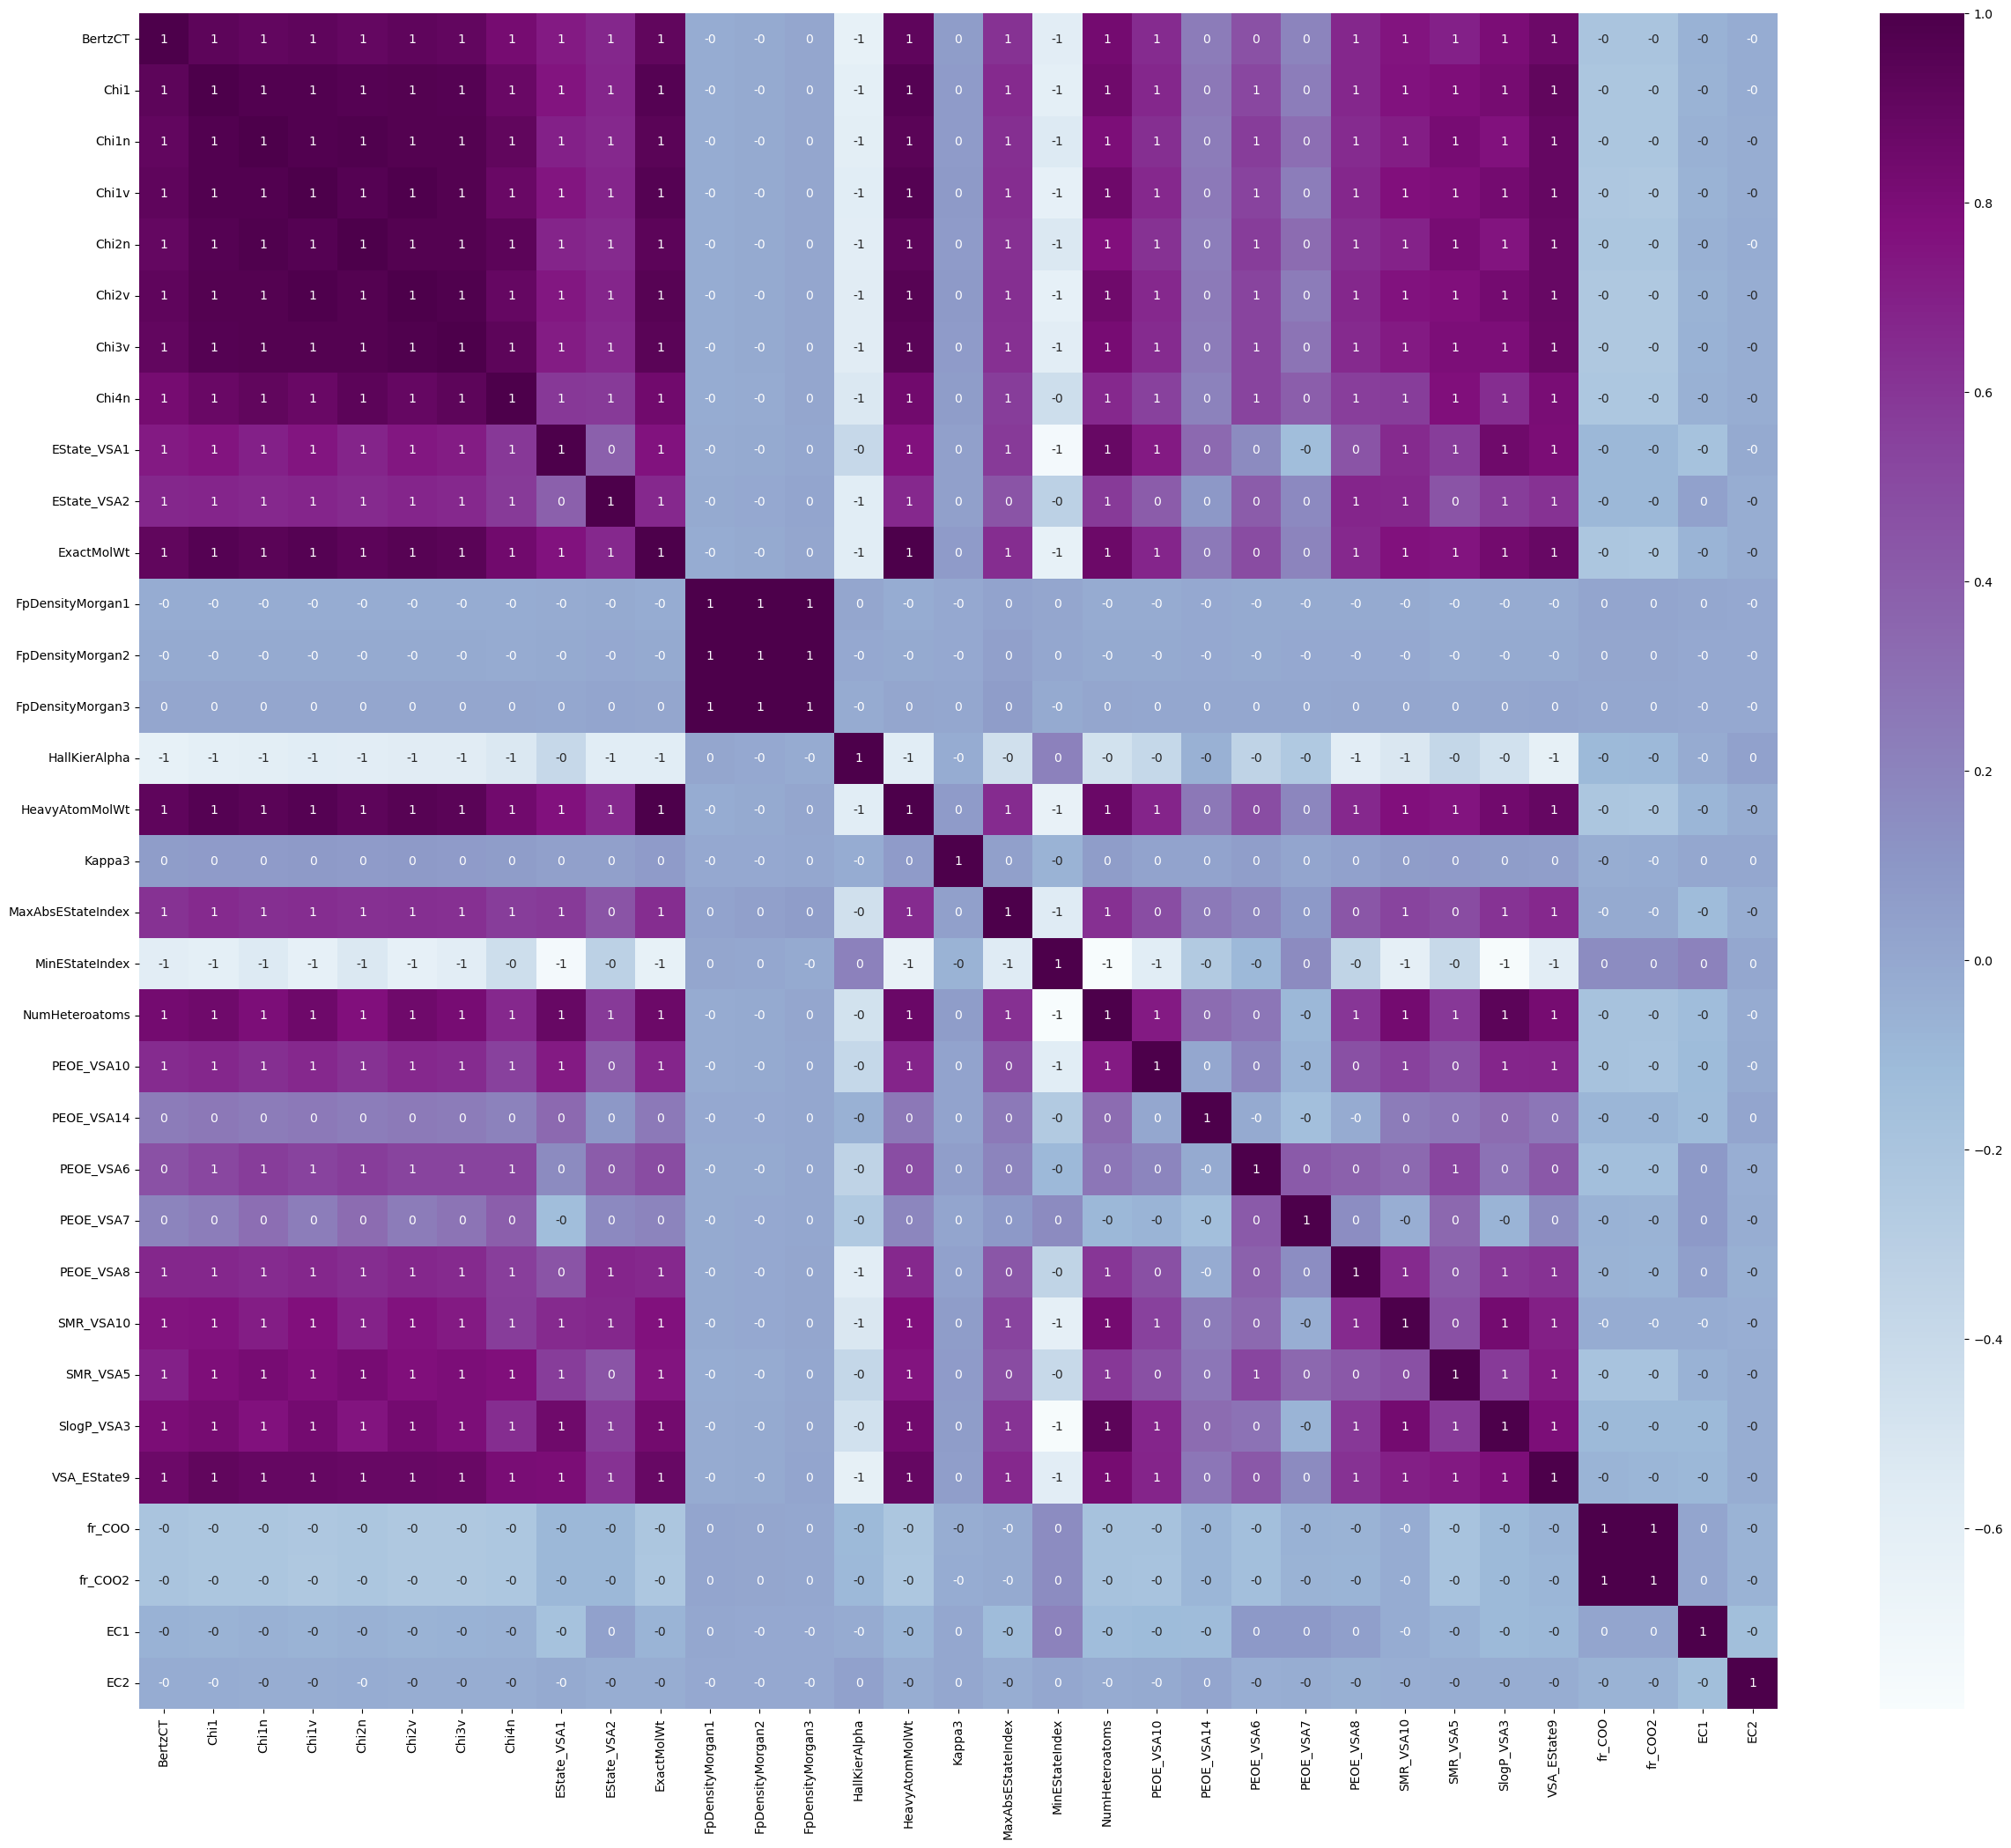

In [10]:
%matplotlib inline

plt.figure ( figsize = ( 30 , 25 ) )

sns.heatmap ( DF_Train.corr ( ) , annot = True , fmt = '0.0f' , cmap = 'BuPu')

In [11]:
# Majority of the columns in data set show high correlation with other columns

High_Corr = DF_Train.corr ( ) [ ( DF_Train.corr ( ) >= 0.5 ) | (DF_Train.corr ( ) <= -0.5 ) ].fillna ( "-" )

High_Corr

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
BertzCT,1.0,0.927629,0.906521,0.922312,0.897368,0.919101,0.908613,0.81873,0.72245,0.664584,0.91501,-,-,-,-0.631727,0.916533,-,0.618805,-0.584845,0.828075,0.646601,-,-,-,0.667995,0.752372,0.696558,0.801567,0.860961,-,-,-,-
Chi1,0.927629,1.0,0.9735,0.978411,0.960249,0.971049,0.96065,0.879138,0.752059,0.674461,0.960466,-,-,-,-0.603047,0.961543,-,0.653747,-0.607686,0.852496,0.670871,-,0.523459,-,0.666387,0.758098,0.783187,0.822502,0.909979,-,-,-,-
Chi1n,0.906521,0.9735,1.0,0.97701,0.983607,0.968451,0.965798,0.914214,0.697719,0.663377,0.940748,-,-,-,-0.591215,0.939796,-,0.632353,-0.542124,0.791468,0.630076,-,0.572505,-,0.648963,0.706382,0.812716,0.765291,0.891629,-,-,-,-
Chi1v,0.922312,0.978411,0.97701,1.0,0.962441,0.986538,0.970371,0.877441,0.745145,0.674537,0.960524,-,-,-,-0.57421,0.961587,-,0.639513,-0.626905,0.856213,0.66186,-,0.542113,-,0.665717,0.770176,0.784626,0.830787,0.890286,-,-,-,-
Chi2n,0.897368,0.960249,0.983607,0.962441,1.0,0.970987,0.971534,0.934039,0.684409,0.655004,0.930542,-,-,-,-0.5819,0.928774,-,0.623239,-0.526849,0.77309,0.618925,-,0.571197,-,0.639612,0.685918,0.813634,0.749101,0.882566,-,-,-,-
Chi2v,0.919101,0.971049,0.968451,0.986538,0.970987,1.0,0.980093,0.889549,0.741071,0.671543,0.956068,-,-,-,-0.567206,0.956842,-,0.633889,-0.623095,0.849558,0.658392,-,0.53744,-,0.665266,0.761452,0.782354,0.826504,0.88435,-,-,-,-
Chi3v,0.908613,0.96065,0.965798,0.970371,0.971534,0.980093,1.0,0.925856,0.7173,0.658281,0.941985,-,-,-,-0.568979,0.942007,-,0.628992,-0.584528,0.815988,0.644154,-,0.535158,-,0.651354,0.724303,0.790831,0.792512,0.87666,-,-,-,-
Chi4n,0.81873,0.879138,0.914214,0.877441,0.934039,0.889549,0.925856,1.0,0.593447,0.580768,0.845252,-,-,-,-0.530959,0.841389,-,0.572191,-,0.660877,0.545786,-,0.536849,-,0.560305,0.567885,0.781454,0.637785,0.805501,-,-,-,-
EState_VSA1,0.72245,0.752059,0.697719,0.745145,0.684409,0.741071,0.7173,0.593447,1.0,-,0.758995,-,-,-,-,0.766878,-,0.58332,-0.754944,0.882927,0.726711,-,-,-,-,0.655484,0.573015,0.847151,0.802368,-,-,-,-
EState_VSA2,0.664584,0.674461,0.663377,0.674537,0.655004,0.671543,0.658281,0.580768,-,1.0,0.662065,-,-,-,-0.579766,0.663346,-,-,-,0.585062,-,-,-,-,0.67729,0.667695,-,0.568868,0.61978,-,-,-,-


### OUTLIERS

#### DETECTING OUTLIERS

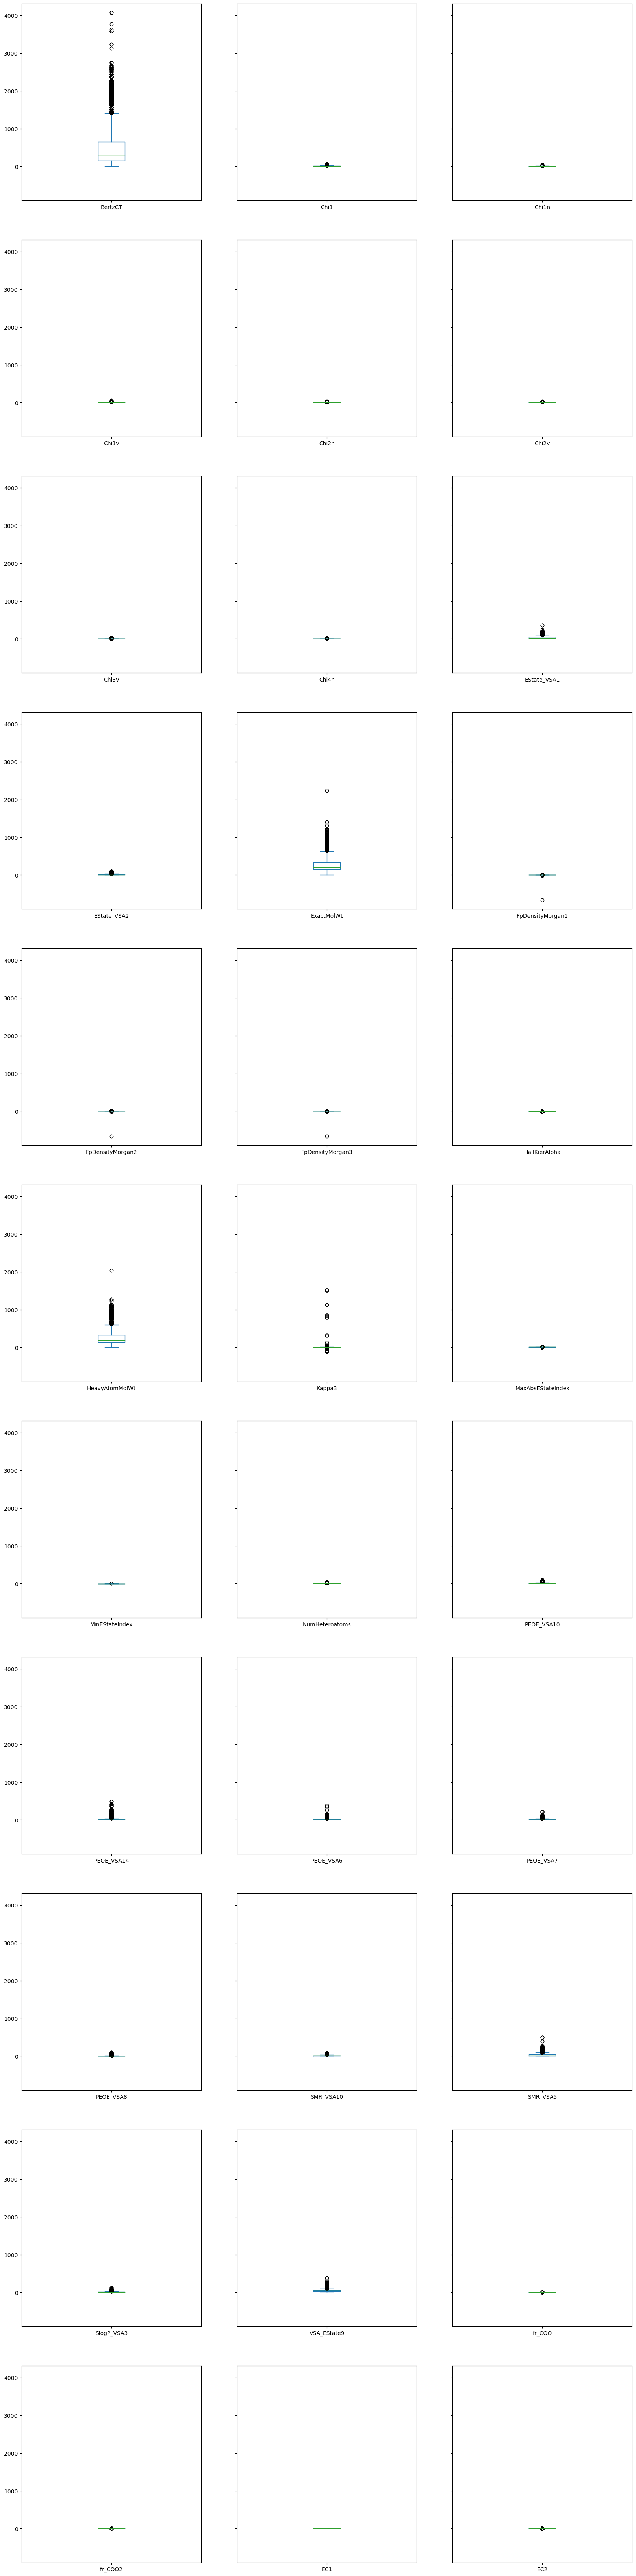

In [12]:
DF_Train.plot ( kind = 'box' , subplots = True , layout = ( 13 , 3 ), figsize = ( 20 , 100 ) , sharex = True , sharey = True );

#### TREATING OUTLIERS

    * BertzCT, EState_VSA1, ExactMolWt, HeavyAtomMolWt, Kappa3, PEOE_VSA14, PEOE_VSA7, SMR_VSA5, VSA_EState9 
    
    * Compared to the other columns, the above columns exhibit a higher number of outliers.

In [13]:
def Z_Score ( DF ) :
    
    for i in DF : 
        
        Mean = DF [ i ].mean ( )
        
        Standard_Deviation = DF [ i ].std ( )
        
        Threshold = 3
        
        Lower_Limit = Mean - Threshold * Standard_Deviation
        
        Upper_Limit = Mean + Threshold * Standard_Deviation
                
        DF [ i ] = DF [ i ].apply ( lambda x : Lower_Limit if x <= Lower_Limit else Upper_Limit if x >= Upper_Limit else x  )
            

In [14]:
Z_Score ( DF_Train )

Z_Score ( DF_Test )

In [15]:
DF_Train.describe ( ).transpose ( )

,count,mean,std,min,25%,50%,75%,max
BertzCT,14838.0,511.417496,528.308282,0.000000,149.103601,290.987941,652.652585,2142.522715
Chi1,14838.0,9.078324,6.613727,0.000000,4.680739,6.485270,11.170477,29.595156
Chi1n,14838.0,5.795486,4.427432,0.000000,2.844556,4.052701,7.486791,19.795499
Chi1v,14838.0,6.672461,5.633233,0.000000,2.932842,4.392859,8.527859,24.337829
Chi2n,14838.0,4.392154,3.607416,0.000000,1.949719,2.970427,5.788793,15.714119
Chi2v,14838.0,5.206084,4.759467,0.000000,2.034468,3.242775,6.609350,20.028416
Chi3v,14838.0,3.392345,3.336639,0.000000,1.160763,1.948613,4.502070,13.727374
Chi4n,14838.0,1.747693,1.754839,0.000000,0.503897,1.073261,2.534281,7.371166
EState_VSA1,14838.0,29.002691,30.829391,0.000000,5.969305,17.353601,44.876559,124.388862
EState_VSA2,14838.0,10.279135,13.049905,0.000000,0.000000,6.420822,12.841643,51.390845


In [16]:
DF_Test.describe ( ).transpose ( )

,count,mean,std,min,25%,50%,75%,max
BertzCT,9893.0,512.705964,530.494470,0.000000,150.255712,289.901774,652.758463,2149.395302
Chi1,9893.0,9.052923,6.560760,0.000000,4.698377,6.447265,10.966946,29.370746
Chi1n,9893.0,5.792710,4.435630,0.000000,2.846050,4.009996,7.490880,19.773032
Chi1v,9893.0,6.670749,5.639170,0.000000,2.934030,4.337841,8.528316,24.325316
Chi2n,9893.0,4.389124,3.612860,0.000000,1.949719,2.930013,5.788793,15.739073
Chi2v,9893.0,5.203858,4.779784,0.000000,2.049137,3.168052,6.516914,20.067098
Chi3v,9893.0,3.376261,3.337394,0.000000,1.171060,1.923982,4.302610,13.696381
Chi4n,9893.0,1.726113,1.736116,0.000000,0.508512,1.058931,2.509394,7.261556
EState_VSA1,9893.0,28.779580,30.678336,0.000000,5.969305,17.282269,44.876559,123.368930
EState_VSA2,9893.0,10.393096,13.223511,0.000000,0.000000,6.420822,12.841643,51.838850


## PREDICTIVE ANALYSIS

### RANDOM SAMPLING


In [17]:
X = DF_Train.drop( ['EC1' , 'EC2'] , axis = 1 )

Y_EC1 = DF_Train [ 'EC1' ]

Y_EC2 = DF_Train [ 'EC2' ]

In [18]:
print ( "The value counts are : " )

print ( "\nY_EC1 : \n\n{}\n\nY_EC2 : \n\n{}".format ( Y_EC1.value_counts ( ) , Y_EC2.value_counts ( ) ) )

The value counts are : 

Y_EC1 : 

1    9908
0    4930
Name: EC1, dtype: int64

Y_EC2 : 

1    11855
0     2983
Name: EC2, dtype: int64


### FEATURE SCALING

In [19]:
Scaler = StandardScaler()

X_Scaled = Scaler.fit_transform ( X )

X = pd.DataFrame ( X_Scaled , columns = list ( X.columns ) ) 

DF_Test_Scaled = Scaler.transform ( DF_Test )

DF_Test = pd.DataFrame ( DF_Test_Scaled , columns = list ( DF_Test.columns ) ) 

display ( X )

display ( DF_Test )

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,-0.355915,0.121206,0.018090,-0.141466,-0.024228,-0.189382,-0.191167,0.000860,-0.940780,0.127144,-0.313765,-0.243886,-0.322285,0.150946,1.076359,-0.295394,0.364982,0.954551,1.110192,-0.600305,-0.802859,2.793658,-0.527705,-0.625903,-0.630342,0.121861,-0.977324,-0.610092,-0.484051,-0.703884,-0.705245
1,-0.449930,-0.275087,-0.305835,-0.148677,-0.306908,-0.151461,-0.356949,-0.260955,0.523310,-0.787706,-0.140667,0.161718,0.553344,1.104161,1.245189,-0.127415,-0.113147,0.242063,-1.312750,0.186163,0.990288,-0.318551,-0.527705,-0.625903,-0.630342,-0.435804,0.006376,0.016069,-0.155237,-0.703884,-0.705245
2,0.019357,0.277157,0.617167,0.777271,0.630150,0.906355,0.729045,0.013042,-0.433280,-0.281410,0.416095,-0.481085,-0.283257,0.236406,0.468572,0.388426,1.025506,0.462041,-1.426972,0.055085,-0.802859,-0.027728,-0.527705,2.545612,-0.630342,0.003898,1.365919,0.303028,-0.121109,-0.703884,-0.705245
3,0.106028,0.510322,0.292196,1.093769,0.578236,1.212796,1.355361,0.751939,2.161545,-0.787706,1.090674,-0.290849,-0.706700,-0.068480,-0.116705,1.120783,0.225860,0.413918,-1.528849,1.365864,2.335148,0.183798,-0.527705,-0.625903,-0.018962,0.003898,1.012358,1.273523,1.377898,-0.703884,-0.705245
4,-0.754598,-0.705164,-0.661636,-0.675696,-0.697620,-0.699776,-0.706092,-0.581286,-0.357536,0.196369,-0.788011,0.404314,0.638962,0.601988,0.108401,-0.796936,-0.042918,-0.532618,0.215094,-0.600305,-0.359135,-0.165535,-0.080719,0.525957,-0.630342,-0.204455,-0.372369,-0.277669,-0.562638,2.400732,2.398406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,0.228642,0.277157,0.177185,0.445142,0.072472,0.173128,0.083375,0.013042,0.128740,-0.281410,0.256191,0.695692,0.830262,0.912080,-0.758259,0.287286,0.048322,0.597591,-1.432617,0.972630,0.463906,-0.027728,-0.527705,0.196857,0.028925,1.058496,0.067281,0.371181,0.441835,-0.703884,-0.705245
14834,-0.849626,-0.973098,-0.982225,-0.927662,-0.973765,-0.909079,-0.964394,-0.995962,-0.940780,-0.787706,-0.988821,3.420937,2.030239,0.863118,0.749955,-0.980143,-0.351043,-3.394532,1.148176,-1.124617,-0.802859,-0.609374,-0.527705,-0.625903,-0.052713,-0.875505,-0.771626,-0.942515,-1.398407,-0.703884,-0.705245
14835,0.889492,0.194263,0.079221,-0.093421,0.085499,-0.106215,-0.098156,0.220087,-0.381277,-0.787706,0.028320,0.446504,0.745983,1.104161,-2.198940,0.042110,-0.224389,1.095875,0.810988,-0.075993,1.729486,-0.609374,-0.527705,-0.625903,1.632288,-0.258941,-0.977324,-0.942515,0.631318,-0.703884,-0.705245
14836,-0.401761,0.131676,0.179404,0.208848,0.245174,0.056805,0.175820,0.314649,0.539150,-0.787706,-0.113629,-0.816047,-1.141874,-0.821169,0.851253,-0.078815,0.389463,0.225480,-0.998418,-0.207071,-0.802859,-0.318551,0.726058,-0.625903,-0.630342,-0.435804,2.513374,-0.312355,-0.123859,-0.703884,-0.705245


,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,-0.315707,-0.271372,-0.298495,-0.148677,-0.271643,-0.116520,-0.388364,-0.359738,0.663541,-0.787706,-0.395789,0.256647,0.168068,0.019468,1.076359,-0.391581,-0.108755,-0.249863,-1.266341,-0.207071,0.542001,-0.107025,-0.527705,-0.625903,-0.630342,0.631401,-0.191162,-0.610092,-0.062224,0.848424,0.846580
1,1.743345,0.239744,0.289916,0.247247,0.250865,0.019123,0.159390,0.468435,-0.940780,1.494624,0.110948,-1.750417,-2.501351,-2.679481,-0.690727,0.032682,0.547822,0.951257,0.880146,-0.600305,-0.802859,-0.609374,1.728444,3.608668,0.284409,-0.875505,0.732712,-0.942515,-0.210421,-0.703884,-0.705245
2,-0.810283,-0.778176,-0.908293,-0.869556,-0.920000,-0.868328,-0.876515,-0.898606,-0.747149,-0.295668,-0.865599,0.541433,0.861566,0.236406,0.378529,-0.864416,0.101307,-0.648681,0.623418,-0.731383,-0.802859,-0.387454,-0.527705,-0.625903,-0.018962,-0.214913,-0.549815,-0.277669,-0.873067,0.848424,0.846580
3,-0.683642,-0.478647,-0.507461,-0.554522,-0.498165,-0.548600,-0.524357,-0.600406,-0.940780,-0.787706,-0.473143,0.849951,1.612856,1.352736,0.704934,-0.507617,-0.088907,-0.273481,1.168202,-0.338149,-0.802859,1.618827,-0.527705,-0.625903,-0.630342,0.121861,0.057130,-0.610092,-0.797410,-0.703884,-0.705245
4,2.471858,2.393983,2.201134,2.374357,2.257574,2.631666,2.573716,1.529240,1.801987,2.841578,2.737219,-0.552934,-0.348058,0.138852,-1.399812,2.764555,0.389463,1.472454,-1.671295,1.496942,1.860135,0.263094,1.125596,-0.625903,2.902163,3.010819,0.262609,2.572527,1.917805,-0.703884,-0.705245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,-0.501608,-0.762341,-0.672823,-0.684488,-0.697620,-0.699776,-0.646289,-0.789245,-0.157522,-0.295668,-0.660142,1.422914,0.360706,0.639292,0.108401,-0.661789,-0.238191,-0.240461,0.474109,-0.469227,0.093714,-0.165535,-0.527705,-0.625903,-0.630342,-0.204455,-0.586229,-0.277669,-0.682034,2.400732,2.398406
9889,0.150774,-0.046491,-0.025529,-0.175749,-0.094729,-0.242818,-0.366996,0.013042,-0.940780,1.375488,0.060926,-0.144163,0.082451,0.863118,-1.467344,-0.006075,-0.302291,1.205791,0.864198,-0.469227,-0.380604,-0.609374,0.647201,1.578848,1.054659,-0.258941,-0.977324,-0.942515,0.147766,-0.703884,-0.705245
9890,-0.252331,-0.418534,-0.540547,-0.418022,-0.436540,-0.238292,-0.426225,-0.331635,0.249876,-0.787706,-0.140667,-0.692640,-0.712565,-0.703661,1.087615,-0.127415,-0.135048,-0.164228,0.138310,0.186163,1.027223,-0.318551,-0.527705,-0.625903,-0.630342,-0.435804,-0.205284,-0.614091,0.057725,-0.703884,-0.705245
9891,0.428242,0.131676,0.348400,0.118140,0.010079,0.155963,0.173867,0.235464,0.259156,-0.787706,0.105741,-0.748734,-1.005276,-0.703661,-0.758259,0.099107,-0.087855,0.686532,0.267099,0.448319,1.860135,-0.609374,-0.527705,-0.625903,-0.040289,-0.875505,-0.578068,-0.277669,0.043295,-0.703884,-0.705245


### LOGISTIC REGRESSION

In [20]:
LR = LogisticRegression (  )

LR1 = LR.fit ( X , Y_EC1 )

Result = pd.DataFrame ( )

Result [ 'EC1_Predicted' ] = LR1.predict ( DF_Test )

LR2 = LR.fit ( X , Y_EC2 )

Result [ 'EC2_Predicted' ] = LR2.predict ( DF_Test )

display ( Result.EC1_Predicted.value_counts ( ) )

display ( Result.EC2_Predicted.value_counts ( ) )

Result

1    8262
0    1631
Name: EC1_Predicted, dtype: int64

1    9891
0       2
Name: EC2_Predicted, dtype: int64

,EC1_Predicted,EC2_Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9888,1,1
9889,1,1
9890,1,1
9891,1,1


### DECISION TREE

In [21]:
DT = DecisionTreeClassifier (  )

Parameters = { 'criterion' : [ 'gini' , 'entropy' ],
               
              'splitter' : [ 'best' ,'random' ],
               
              'max_depth' : [ None , 5 , 10 ] }

GS = GridSearchCV ( estimator = DT , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC1 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

DT = DecisionTreeClassifier ( **Best_Parameters )

DT.fit ( X , Y_EC1 )

DT_Result = pd.DataFrame (  )

DT_Result [ 'EC1_Predicted' ] = DT.predict ( DF_Test )

display ( DT_Result.EC1_Predicted.value_counts ( ) )

DT_Result

The best parameters are as follows : 

 {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


1    7639
0    2254
Name: EC1_Predicted, dtype: int64

,EC1_Predicted
0,1
1,1
2,1
3,1
4,1
...,...
9888,1
9889,1
9890,0
9891,0


In [22]:
DT = DecisionTreeClassifier (  )

Parameters = { 'criterion' : [ 'gini' , 'entropy' ],
               
              'splitter' : [ 'best' ,'random' ],
               
              'max_depth' : [ None , 5 , 10 ] }

GS = GridSearchCV ( estimator = DT , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC2 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

DT = DecisionTreeClassifier ( **Best_Parameters )

DT.fit ( X , Y_EC2 )

DT_Result [ 'EC2_Predicted' ] = DT.predict ( DF_Test )

display ( DT_Result.EC2_Predicted.value_counts ( ) )

DT_Result

The best parameters are as follows : 

 {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


1    9883
0      10
Name: EC2_Predicted, dtype: int64

,EC1_Predicted,EC2_Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9888,1,1
9889,1,1
9890,0,1
9891,0,1


### RANDOM FOREST

In [23]:
RF = RandomForestClassifier (  )

Parameters = { 'criterion' : [ 'gini' , 'entropy' ],
               
              'n_estimators' : [ 100 , 200 , 300 ],
               
              'max_depth' : [ None , 5 , 10 ] }

GS = GridSearchCV ( estimator = RF , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC1 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

RF = RandomForestClassifier ( **Best_Parameters )

RF.fit ( X , Y_EC1 )

RF_Result = pd.DataFrame (  )

RF_Result [ 'EC1_Predicted' ] = RF.predict ( DF_Test )

display ( RF_Result.EC1_Predicted.value_counts ( ) )

RF_Result

The best parameters are as follows : 

 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


1    7938
0    1955
Name: EC1_Predicted, dtype: int64

,EC1_Predicted
0,0
1,1
2,1
3,1
4,1
...,...
9888,1
9889,1
9890,0
9891,0


In [24]:
RF = RandomForestClassifier (  )

Parameters = { 'criterion' : [ 'gini' , 'entropy' ],
               
              'n_estimators' : [ 50 , 100 ],
               
              'max_depth' : [ None , 5 , 10 ] }

GS = GridSearchCV ( estimator = RF , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC2 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

RF = RandomForestClassifier ( **Best_Parameters )

RF.fit ( X , Y_EC2 )

RF_Result [ 'EC2_Predicted' ] = RF.predict ( DF_Test )

display ( RF_Result.EC2_Predicted.value_counts ( ) )

RF_Result

The best parameters are as follows : 

 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


1    9893
Name: EC2_Predicted, dtype: int64

,EC1_Predicted,EC2_Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9888,1,1
9889,1,1
9890,0,1
9891,0,1


### GRADIENT BOOSTING

In [26]:
GB = GradientBoostingClassifier (  )

Parameters = { 'learning_rate' : [ 0.1 , 0.001 ] ,
              
               'n_estimators' : [ 100 , 200 ]  }

GS = GridSearchCV ( estimator = GB , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC1 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

GB = GradientBoostingClassifier ( **Best_Parameters )

GB.fit ( X , Y_EC1 )

GB_Result = pd.DataFrame (  )

GB_Result [ 'EC1_Predicted' ] = GB.predict ( DF_Test )

display ( GB_Result.EC1_Predicted.value_counts ( ) )

GB_Result

The best parameters are as follows : 

 {'learning_rate': 0.1, 'n_estimators': 100}


1    7817
0    2076
Name: EC1_Predicted, dtype: int64

,EC1_Predicted
0,0
1,1
2,1
3,1
4,1
...,...
9888,1
9889,1
9890,0
9891,0


In [28]:
GB = GradientBoostingClassifier (  )

Parameters = { 'learning_rate' : [ 0.1 , 0.01 ] ,
              
               'n_estimators' : [ 100 , 200 ]  }

GS = GridSearchCV ( estimator = GB , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC2 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

GB = GradientBoostingClassifier ( **Best_Parameters )

GB.fit ( X , Y_EC2 )

GB_Result [ 'EC2_Predicted' ] = GB.predict ( DF_Test )

display ( GB_Result.EC2_Predicted.value_counts ( ) )

GB_Result

The best parameters are as follows : 

 {'learning_rate': 0.01, 'n_estimators': 100}


1    9893
Name: EC2_Predicted, dtype: int64

,EC1_Predicted,EC2_Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9888,1,1
9889,1,1
9890,0,1
9891,0,1


### EXTREME GRADIENT BOOSTING

In [30]:
from xgboost import XGBClassifier

XGB = XGBClassifier ( random_state = 42 )

Parameters = { 'n_estimators': [ 100, 200 ],  
    
               'learning_rate': [ 0.5 , 0.001], 
    
               'max_depth': [3, 5 ]  }

GS = GridSearchCV ( estimator = XGB , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC1 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

XGB = GradientBoostingClassifier ( **Best_Parameters )

XGB.fit ( X , Y_EC1 )

XGB_Result = pd.DataFrame (  )

XGB_Result [ 'EC1_Predicted' ] = XGB.predict ( DF_Test )

display ( XGB_Result.EC1_Predicted.value_counts ( ) )

XGB_Result

The best parameters are as follows : 

 {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 200}


1    9893
Name: EC1_Predicted, dtype: int64

,EC1_Predicted
0,1
1,1
2,1
3,1
4,1
...,...
9888,1
9889,1
9890,1
9891,1


In [32]:
XGB =  XGBClassifier( random_state = 42 )

Parameters = { 'n_estimators': [ 100, 200 ],  
    
               'learning_rate': [ 0.5 , 0.001], 
    
               'max_depth': [3, 5 ]  }

GS = GridSearchCV ( estimator = XGB , param_grid = Parameters , cv = 5 )

GS.fit ( X , Y_EC2 )

Best_Parameters = GS.best_params_ 

print ( "The best parameters are as follows : \n\n" , Best_Parameters )

XGB = XGBClassifier ( **Best_Parameters )

XGB.fit ( X , Y_EC2 )

XGB_Result [ 'EC2_Predicted' ] = XGB.predict ( DF_Test )

display ( XGB_Result.EC2_Predicted.value_counts ( ) )

XGB_Result

The best parameters are as follows : 

 {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 200}


1    9893
Name: EC2_Predicted, dtype: int64

,EC1_Predicted,EC2_Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9888,1,1
9889,1,1
9890,1,1
9891,1,1
